# MATH7002 Advanced Statistical methods
## Worksheet 8

1. Consider the following 2 variable linear program.

\begin{align*}
\text{Maximize  }&& z=4x_1+6x_2 &\\
\text{subject to  }&&  6x_1+5x_2 &\le 60\\
&&x_1&\le 7\\
&&x_2 &\le 7\\
&&x_1,x_2 &\ge 0\\
\end{align*}

a. Sketch the feasible region.

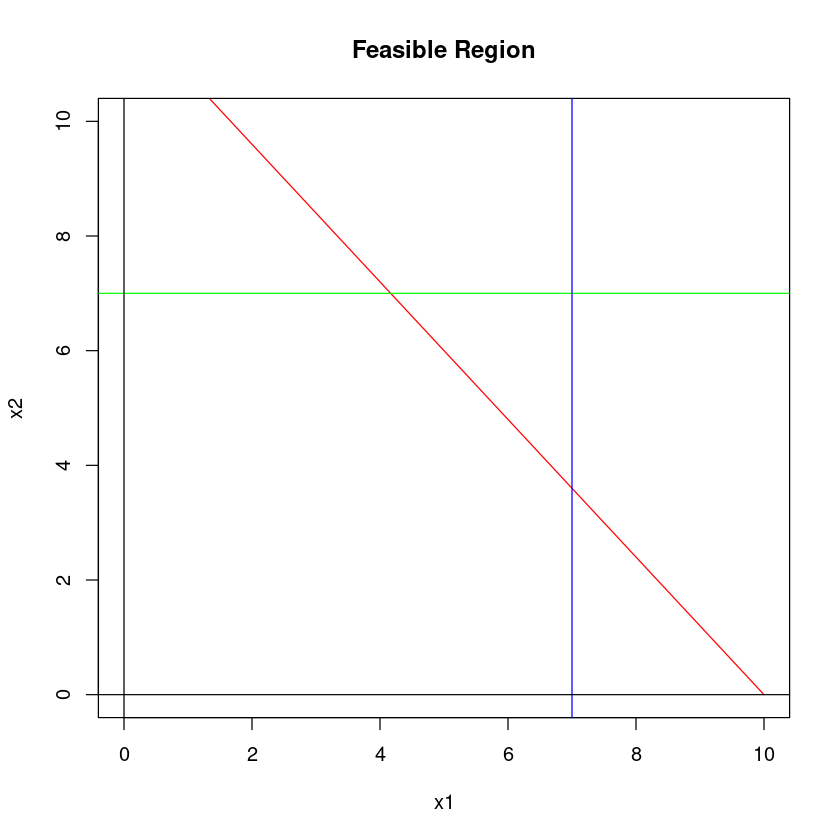

In [9]:
x1 <- seq(0, 10, 0.1)
line1 <- (60 - 6 * x1)/5
line1[line1 < 0] <- NA
plot(x1, line1, type = "l", col = "red", ylim = c(0,10), xlab = "x1", ylab = "x2", main = "Feasible Region")
abline(h= 7, col ="green") # Constrain for the x2<=7
abline(v= 7, col ="blue") # Constrain for the x1 <=7
abline(h=0, col = "black") # Constraint for the x1 >=0
abline(v=0, col = "black") # Constraint for the x2 >= 0 

In [ ]:
# We have two packages to solve linear regression method 
# lpSolve

In [1]:
library(lpSolve)
# We need to pass four arguments: objective, constrains, constrain directions, right handside
objective <- c(4,6)
constraints <- matrix(c(6,5,1,0,0,1), nrow = 3, byrow = TRUE)
directions <- c("<=", "<=", "<=")
rhs <- c(60, 7, 7)
solution <- lp("max", objective, constraints, directions, rhs)

In [2]:
solution

Success: the objective function is 58.66667 

In [3]:
solution$solution # Check the optimal solution

[1] 4.166667 7.000000

In [4]:
solution$objval # The optimal objective value

[1] 58.66667

In [5]:
# Second package 
library(linprog)

In [6]:
A <- matrix(c(6,5,1,0,0,1), nrow = 3, byrow = TRUE) 
b <- c(60, 7, 7)
c <- c(4,6)

In [7]:
solveLP(c, b, A, maximum = TRUE, verbose = 4)

[1] "initial Tableau"
     1  2 S 1 S 2 S 3 P0
1    6  5   1   0   0 60
2    1  0   0   1   0  7
3    0  1   0   0   1  7
Z-C -4 -6   0   0   0  0

Pivot Column: 2 ( 2 )
Pivot Row: 3 ( 3 )

     1 2 S 1 S 2 S 3 P0
1    6 0   1   0  -5 25
2    1 0   0   1   0  7
2    0 1   0   0   1  7
Z-C -4 0   0   0   6 42

Pivot Column: 1 ( 1 )
Pivot Row: 1 ( 1 )

    1 2        S 1 S 2        S 3        P0
1   1 0  0.1666667   0 -0.8333333  4.166667
2   0 0 -0.1666667   1  0.8333333  2.833333
2   0 1  0.0000000   0  1.0000000  7.000000
Z-C 0 0  0.6666667   0  2.6666667 58.666667




Results of Linear Programming / Linear Optimization

Objective function (Maximum): 58.6667 

Iterations in phase 1: 0
Iterations in phase 2: 2
Solution
      opt
1 4.16667
2 7.00000

Basic Variables
        opt
1   4.16667
2   7.00000
S 2 2.83333

Constraints
    actual dir bvec    free     dual dual.reg
1 60.00000  <=   60 0.00000 0.666667 25.00000
2  4.16667  <=    7 2.83333 0.000000  2.83333
3  7.00000  <=    7 0.00000 2.666667  3.40000

All Variables (including slack variables)
        opt cvec    min.c    max.c      marg marg.reg
1   4.16667    4  0.00000 7.200000        NA       NA
2   7.00000    6  3.33333      Inf        NA       NA
S 1 0.00000    0     -Inf 0.666667 -0.666667     25.0
S 2 2.83333    0 -3.20000 4.000000  0.000000       NA
S 3 0.00000    0     -Inf 2.666667 -2.666667      3.4


b. Find the optimal solution.
    

# Practice this question !  10 mins ! 

2. Consider the linear programming problem below.

\begin{align*}
\text{Maximise} &&  z = 20x_1 + 15x_2 + 10x_3&  \\
\text{Subject to} && 2x_1+x_2+3x_3 & \le 42\\
&&2x_1+x_2+2x_3 & \le 40\\
&&x_1+2x_2+x_3 & \le 45\\
&&x_1,x_2,x_3 & \ge 0
\end{align*}

Using the simplex method find the optimal values of $x_1$,
  $x_2$, $x_3$ and $z$.

In [12]:
# Constraint matrix
A <- matrix(c(2, 1, 3, 2, 1, 2, 1, 2, 1), ncol = 3, byrow = TRUE)
b <- c(42, 40, 45)
c <- c(20, 15, 10)

In [13]:
solveLP(c, b, A, maximum = TRUE, verbose = 4)

[1] "initial Tableau"
      1   2   3 S 1 S 2 S 3 P0
1     2   1   3   1   0   0 42
2     2   1   2   0   1   0 40
3     1   2   1   0   0   1 45
Z-C -20 -15 -10   0   0   0  0

Pivot Column: 1 ( 1 )
Pivot Row: 2 ( 2 )

    1    2  3 S 1  S 2 S 3  P0
1   0  0.0  1   1 -1.0   0   2
1   1  0.5  1   0  0.5   0  20
3   0  1.5  0   0 -0.5   1  25
Z-C 0 -5.0 10   0 10.0   0 400

Pivot Column: 2 ( 2 )
Pivot Row: 3 ( 3 )

    1 2  3 S 1        S 2        S 3        P0
1   0 0  1   1 -1.0000000  0.0000000   2.00000
1   1 0  1   0  0.6666667 -0.3333333  11.66667
2   0 1  0   0 -0.3333333  0.6666667  16.66667
Z-C 0 0 10   0  8.3333333  3.3333333 483.33333




Results of Linear Programming / Linear Optimization

Objective function (Maximum): 483.333 

Iterations in phase 1: 0
Iterations in phase 2: 2
Solution
      opt
1 11.6667
2 16.6667
3  0.0000

Basic Variables
        opt
1   11.6667
2   16.6667
S 1  2.0000

Constraints
  actual dir bvec free    dual dual.reg
1     40  <=   42    2 0.00000      2.0
2     40  <=   40    0 8.33333     17.5
3     45  <=   45    0 3.33333     25.0

All Variables (including slack variables)
        opt cvec min.c    max.c      marg marg.reg
1   11.6667   20    10 30.00000        NA       NA
2   16.6667   15    10 40.00000        NA       NA
3    0.0000   10  -Inf 20.00000 -10.00000      2.0
S 1  2.0000    0   -10  8.33333   0.00000       NA
S 2  0.0000    0  -Inf  8.33333  -8.33333     17.5
S 3  0.0000    0  -Inf  3.33333  -3.33333     25.0


3.  At a preschool lunch is provided. The following table shows the available food products.

In [14]:
dat = c(10,75,0,20,70,0,
        70,100,50,60,150,100,
        0,0,3,0,2,120,
        3,4,0,1,8,1,
        5,4,7,8,15,35)
dat=matrix(dat, ncol=5)
library(kableExtra)
colnames(dat) = c("Calories from Fat", "Total Calories", "Vitamin C (mg)", "Protein (g)", "Cost (c)")
rownames(dat) = c("Bread (1 slice)", "Peanut Butter (1 tbsp)", "Jam (1 tbsp)", "Cracker (1)",
                  "Milk (1 cup)", "Juice (1 cup)")
kable(dat, caption="")



Table: 

|                       | Calories from Fat| Total Calories| Vitamin C (mg)| Protein (g)| Cost (c)|
|:----------------------|-----------------:|--------------:|--------------:|-----------:|--------:|
|Bread (1 slice)        |                10|             70|              0|           3|        5|
|Peanut Butter (1 tbsp) |                75|            100|              0|           4|        4|
|Jam (1 tbsp)           |                 0|             50|              3|           0|        7|
|Cracker (1)            |                20|             60|              0|           1|        8|
|Milk (1 cup)           |                70|            150|              2|           8|       15|
|Juice (1 cup)          |                 0|            100|            120|           1|       35|

Each child should have 

+ between 400 and 600 calories
+ no more that 30% of calories from fat
+ at least 60mg of Vitamin C and 12g of protein
+ exactly 2 slices of bread
+ at least twice as much PB as Jam
+ at least one cup of liquid

Cost should minimised.

a. Write as a linear program

In [18]:
# First write down the constraint matrix 
Constrain_matrix = rbind(c(70, 100, 50, 60, 150, 100), c(70, 100, 50, 60, 150, 100), 
                        0.3*c(70, 100, 50, 60, 150, 100)- c(10, 75, 0, 20 ,70,0),
                        c(0, 0, 3, 0, 2, 120), c(0,0,3,0,2,120), c(1, 0,0,0,0,0), c(0,1,-2, 0, 0,0),
                        c(0,0,0,0,1,1))
# Objective function 
cost = c(5,4, 7,8,15,35) 
# Right handside
rhs = c(400, 600, 0, 60, 12, 2, 0, 1)
direction = c(">=", "<=", ">=", ">=", ">=", "=", ">=", ">=")

In [19]:
solveLP(cost, rhs, Constrain_matrix, maximum = FALSE, const.dir = direction, lpSolve = TRUE)



Results of Linear Programming / Linear Optimization
(using lpSolve)

Objective function (Minimum): 47.3106 

Solution
       opt
1 2.000000
2 0.574751
3 0.287375
4 1.039452
5 0.515781
6 0.484219

Constraints
  actual dir bvec free
1    400  >=  400    0
2    400  <=  600  200
3      0  >=    0    0
4     60  >=   60    0
5     60  >=   12   48
6      2   =    2    0
7      0  >=    0    0
8      1  >=    1    0


b. Solve
    

In [20]:
# If you want to add interger contraint to your variable 

In [21]:
require(lpSolve)
# Add addtional contraint to the number of cracker
sol = lp(direction = "min", objective.in = cost, const.mat = Constrain_matrix, const.dir = direction, 
        const.rhs = rhs, int.vec =4)

In [22]:
sol

Success: the objective function is 51.41356 

In [23]:
sol$solution

[1] 2.0000000 0.1457627 0.0000000 2.0000000 0.5084746 0.4915254